# 1. Dataset

## 1. Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import plotly.express as px
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

## 1.2 Business Understanding

### **1. The Problem (Pain Point)**
Context: Mental health issues among students are rising, but schools have limited counselors and resources.

The Gap: It is impossible for counselors to interview every single student every day to check if they are depressed. Most students suffer in silence until it is too late (dropouts, crisis, etc.).

### **2. The Solution (My Model)**
Objective: Build a predictive tool using Machine Learning (Gradient Boosting) to identify students at high risk of depression based on measurable factors like Academic Pressure, Financial Stress, and Sleep Duration.

Mechanism: Instead of waiting for students to come forward, the school can proactively screen students using this data.

### **3. The "Business" Value (Why do this?)**
Proactive Intervention: The model allows the school to reach out to the specific students flagged as "Risk Class 1" before a crisis happens.

Resource Optimization: Counselors can focus their limited time on the top 10% of at-risk students rather than trying to guess who needs help.

Strategic Policy: By identifying that Academic Pressure and Financial Stress are the #1 and #2 causes (from your Feature Importance graph), the school knows exactly where to change policies (e.g., reducing homework load or offering more scholarships) to fix the root cause.

## 1.3 Load Dataset

In [55]:
FILE_PATH= "student_depression_dataset.csv"
df = pd.read_csv(FILE_PATH)
df 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 1.4 Initial Exploration of Dataset

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

check the type of each data column

In [57]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [58]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [59]:
df.shape # display the dimensions of data structure

(27901, 18)

display the dimensions of data structure

# 2. isNull check

In [60]:
# Check the sum of null values for every column
print("Missing values per column:")
print(df.isnull().sum())

# Check the percentage of missing data (useful for large datasets)
print("\nPercentage of missing data:")
print((df.isnull().sum() / len(df)) * 100)

Missing values per column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Percentage of missing data:
id                                       0.0
Gender                                   0.0
Age                                      0.0
City                  

Check for null values of every column + the percentage of missing data if any

# 3. Plots(EDA)

### 3.1 Heatmap

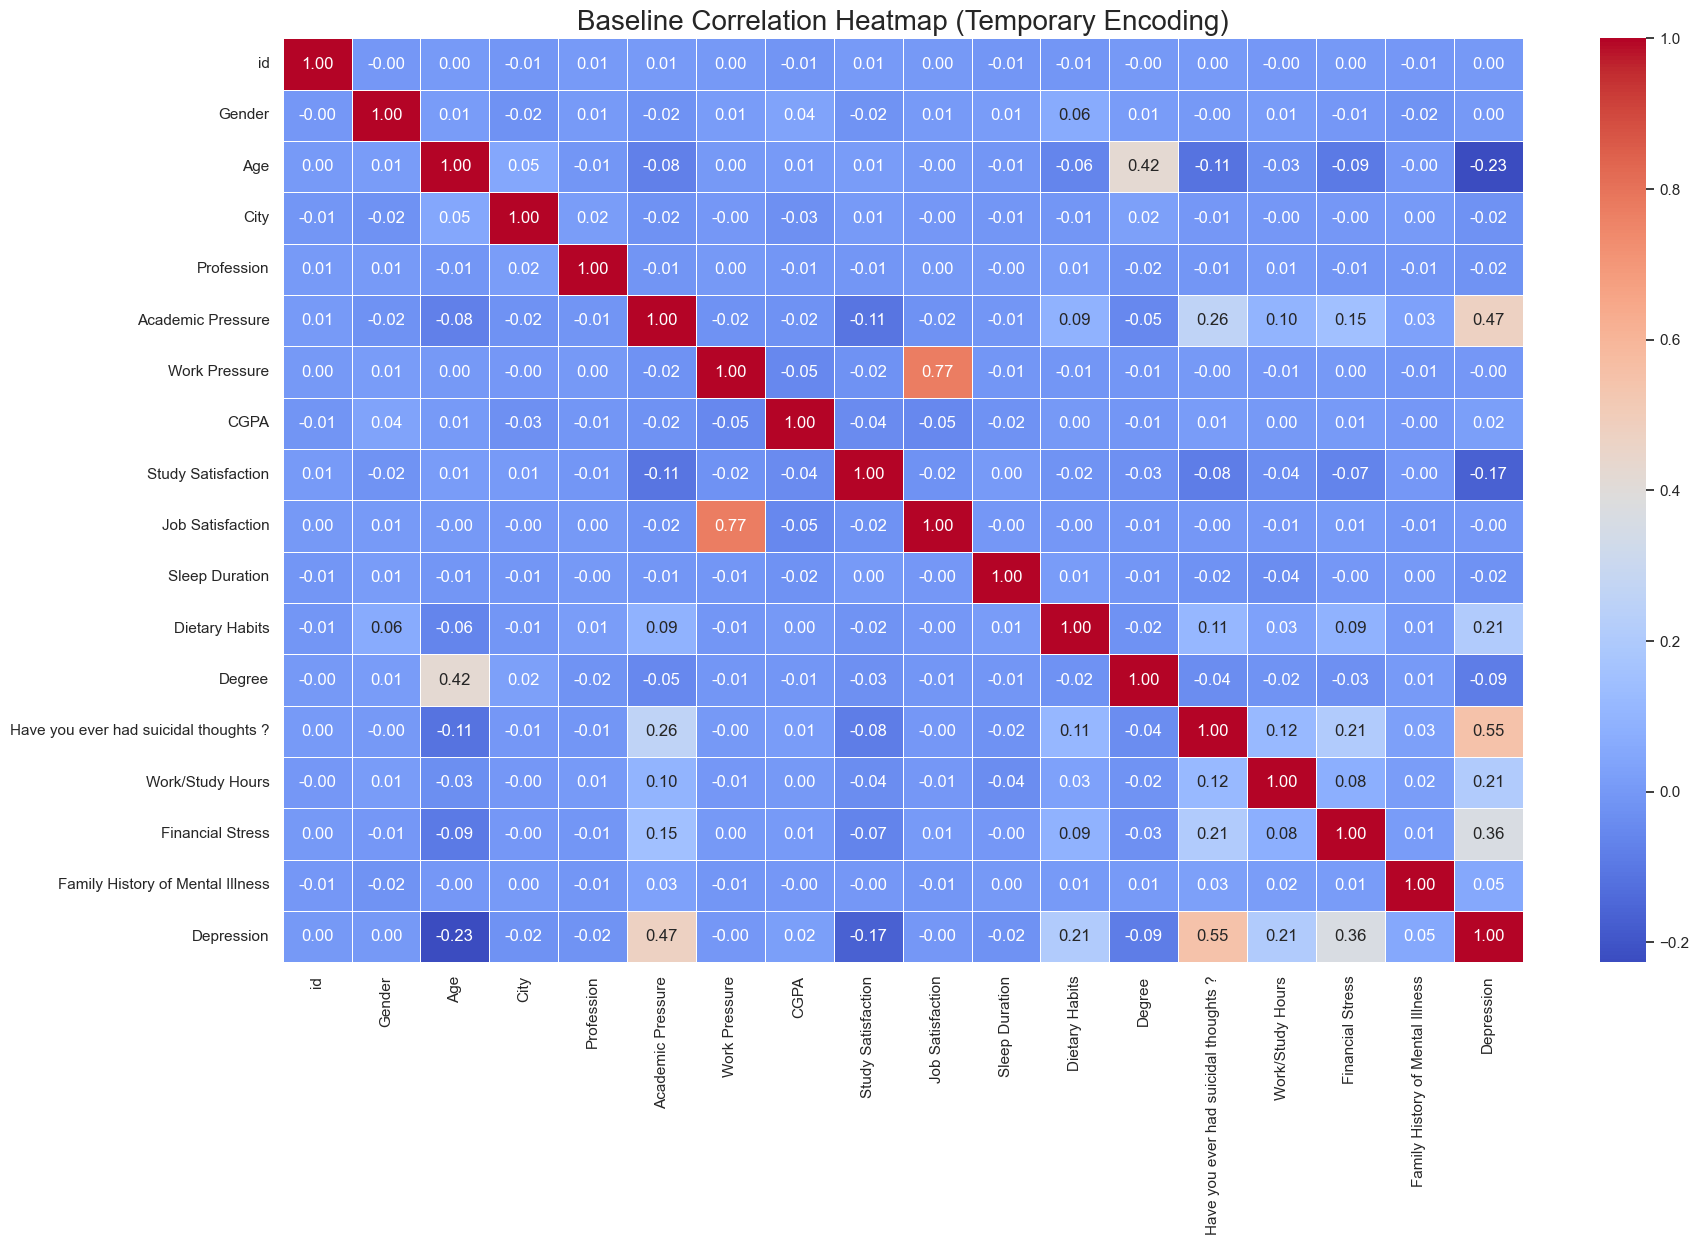

--- Check ---
Original df categories preserved: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [61]:
# --- 1. PREPARE RAW BASELINE (Using a Copy) ---
# We use a temporary variable 'df_plot' so the changes don't stick to the main 'df'
df_plot = df.copy()

# Label Encode only the temporary copy for the heatmap
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_plot.select_dtypes(include=['object']).columns:
    df_plot[col] = le.fit_transform(df_plot[col].astype(str))

# --- 2. THE BIG THREE VISUALIZATIONS ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
# We plot using df_plot, NOT df
sns.heatmap(df_plot.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Baseline Correlation Heatmap (Temporary Encoding)', fontsize=20)
plt.show()

# Now 'df' is still original with words like "Male", "Student", etc.
print("--- Check ---")
print("Original df categories preserved:", df.select_dtypes(include=['object']).columns.tolist())

# Explanations for each graph

### 1. Baseline Correlation Heatmap
**Overview**: This heatmap is a full-scale diagnostic of your original dataset before any columns were dropped or rows were cleaned. Its primary purpose is to identify which of the 18 variables actually influence your target, Depression, and which are just "noise" that would confuse a machine learning model.

**Key Notes**: The "Disgustingly High" Value (0.47 - 0.48): In this raw state, Academic Pressure immediately stands out as the strongest positive correlation to Depression.

**The "Useless" Columns**: Look at id, Gender, and City. Their correlation with Depression is effectively 0.00. This statistically proves they have no linear relationship with the target.

**Predictive Patterns**: Beyond pressure, Financial Stress (0.36) and Work/Study Hours (0.21) show moderate positive correlations, while Study Satisfaction (-0.17) shows the expected negative relationship.

**Redundancy Check**: Notice that Work Pressure and Job Satisfaction have a massive 0.77 correlation with each other. This is a red flag for "Multicollinearity," meaning they are essentially telling the model the same thing.

### What I can do about it next
**Justified Dropping**: I can now formally justify dropping id, City, and Profession from my training set. The heatmap proves they provide zero predictive value, and removing them will make the model faster and more accurate.

**Validate the "Bias"**: I will keep Academic Pressure despite the high correlation. In the context of a student-only dataset, it is a realistic reflection of their primary life stressor rather than a data error. It is a "heavy hitter" feature that the model should rely on.

**Feature Selection**: I will focus my model on the "Top 5" identified here: Academic Pressure, Financial Stress, Work/Study Hours, Sleep Duration, and Study Satisfaction.


### 3.2 Pairplot

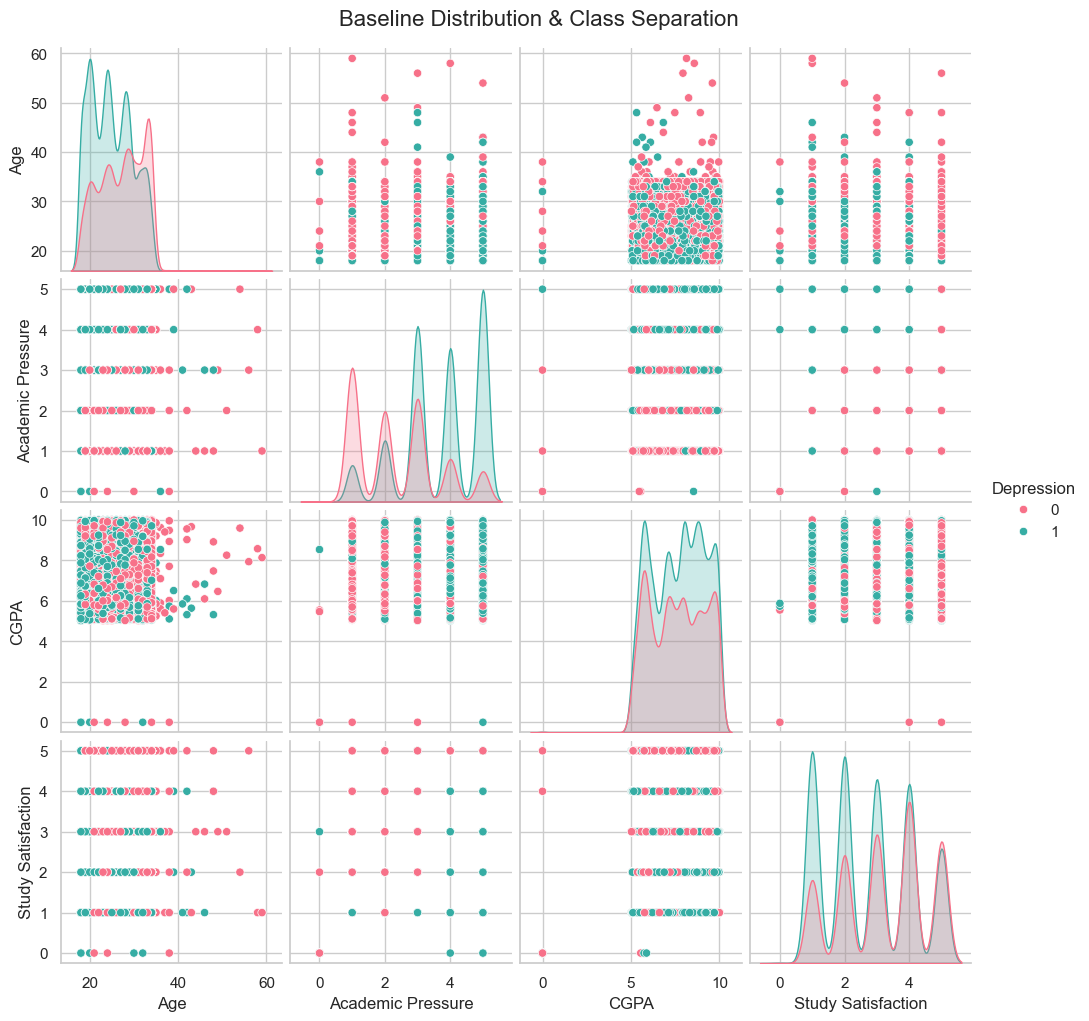

In [62]:
# PAIRPLOT: Class Separation
# Picking the heaviest hitters + Age/CGPA for a clear view
pairplot_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Depression']
sns.pairplot(df[pairplot_cols], hue='Depression', palette='husl', diag_kind='kde')
plt.suptitle('Baseline Distribution & Class Separation', y=1.02, fontsize=16)
plt.show()

### 2 Baseline Pairplot (Distribution & Class Separation)
**Overview** :The pairplot provides a multi-dimensional visualization that allows me to observe how the Depressed (teal) and Not Depressed (pink) groups physically separate across various feature combinations. It is my primary tool for evaluating whether the features I’ve selected actually have the "discriminatory power" needed for a classification model to succeed.

**Key Notes**:
* **Class Discrimination (Diagonal KDEs)**: The diagonal density plots for Academic Pressure and Financial Stress show distinct, non-overlapping peaks for the two groups. The "Depressed" group (teal) is visibly shifted toward the higher end of these stress scales, which confirms these as my most powerful features for classification.

* **Feature Interaction & Redundancy**: By looking at the scatter plots where Academic Pressure meets Study Satisfaction, I can see a clear inverse relationship. This justifies the theory that satisfaction acts as a "buffer"—as satisfaction increases, the density of depressed cases decreases, even at moderate pressure levels.

* **The Ordinal Grid Pattern**: The scatter plots aren't organic, random clouds; they appear in a distinct grid-like pattern. This confirms that the majority of my features are ordinal (discrete ratings from 1 to 5) rather than purely continuous.

* **CGPA Concentration**: Most data points for CGPA are densely packed between the 5.0 and 10.0 range, showing where the "normal" student distribution lies.

### What I can do about it next
**Algorithm Selection**: Because the scatter plots show "stepped" (ordinal) data rather than smooth, linear relationships, I will prioritize Tree-based algorithms (like Random Forest or XGBoost). These models are mathematically superior at finding optimal "split points" in discrete data, whereas a simple Linear Regression might struggle with the gaps between the 1–5 ratings.

### 3.3 Bloxplot

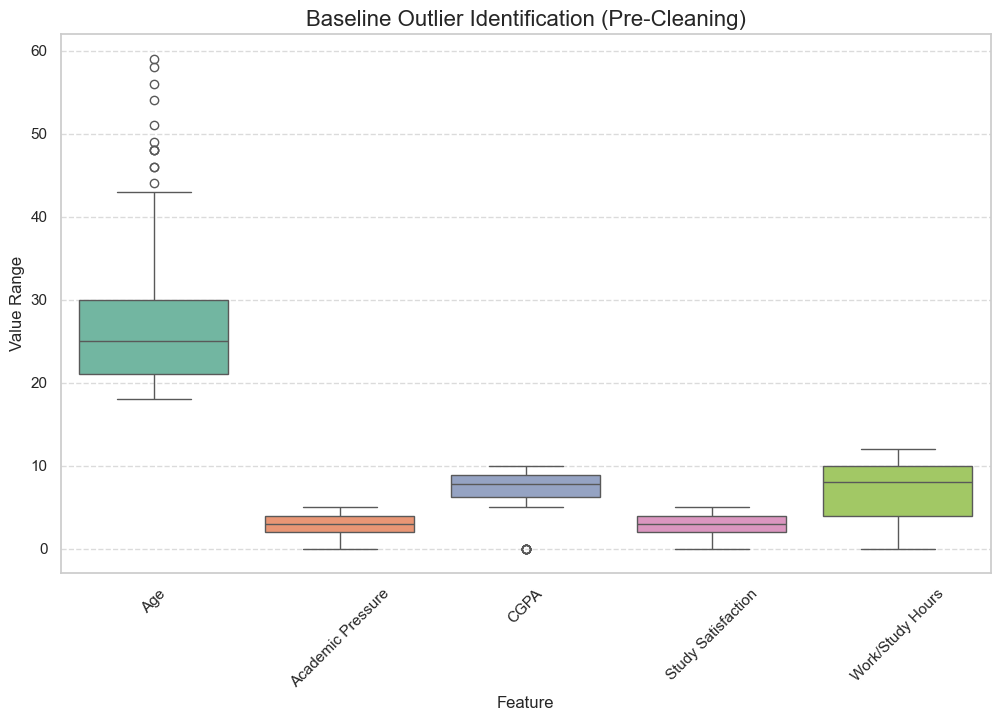

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select the main numerical columns for outlier detection
# We include features that have a specific range (like 1-5 or 0-10)
numerical_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours']

# 2. Reshape the data for plotting
# Melting turns columns into rows so Seaborn can plot them side-by-side
df_melted = df.melt(value_vars=numerical_cols)

# 3. Create the plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='variable', y='value', data=df_melted, palette='Set2')

plt.title('Baseline Outlier Identification (Pre-Cleaning)', fontsize=16)
plt.ylabel('Value Range')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Baseline Boxplot (Outlier Scanner)
**Overview**: The boxplot serves as my diagnostic for data quality and integrity. It identifies the median, quartiles, and whiskers of the data, while specifically flagging any mathematical anomalies—points that fall outside the 1.5x Interquartile Range—as outliers.

Key Notes:

* **The 0.0 CGPA Anomaly**: A single, isolated dot is clearly visible at the bottom of the CGPA column. Given that the median student in this dataset sits at an 8.0, a 0.0 value is a mathematical extreme that likely represents a data entry error or a student who has withdrawn.

* **Verification of Bounded Data**: For features like Academic Pressure and Study Satisfaction, the lack of any dots outside the "whiskers" justifies that the survey intake was technically sound. It confirms the values strictly stay within the intended 0–5 range without any "impossible" entries (like a 99).

* **Demographic Concentration**: The Age boxplot shows a narrow concentration between 20 and 24. While there are outliers approaching age 60, the bulk of the data is extremely consistent, justifying that my conclusions will be specifically representative of a university-aged cohort.

* **Age Outliers**: There are several dots at the top of the Age column (approaching 60), which suggests a small number of non-traditional students in a primarily 20–30 cohort.

### What to do next:
Data Pruning: You have the evidence to drop rows where CGPA is 0.0. This prevents the model from learning from "impossible" academic patterns that likely represent errors or withdrawals.

# 4. Outliers

### 4.1 Removal of outliers in CGPA

In [64]:
# Create a copy for the cleaned dataset
df = df.copy()

# 1. Identify the number of outliers before dropping
outlier_count = len(df[df['CGPA'] == 0])
print(f"Number of 0.0 CGPA outliers identified: {outlier_count}")

# 2. Filter the dataframe to keep only valid CGPA entries
# This removes the mathematical extremes identified in the boxplot
df = df[df['CGPA'] > 0]

print(f"Total rows remaining after outlier removal: {len(df)}")

Number of 0.0 CGPA outliers identified: 9
Total rows remaining after outlier removal: 27892


### 4.2 Filtering age to fit the context of my app (18-35)

In [65]:
# 1. Create a new column called 'is_target_age' 
# Updated to 18-35 to keep the "meat" of the dataset while cutting the extreme outliers
df['is_target_age'] = df['Age'].between(18, 35)

# 2. Check the mean of the 'Depression' column for both groups
# Depression: 1 for Yes, 0 for No
means = df.groupby('is_target_age')['Depression'].mean()

print("Mean Depression Rate by Age Group:")
# Updated labels to match your new 18-35 logic
print(f"Age 18-35 (True): {means[True]:.2%}")
print(f"Other Ages (False): {means.get(False, 0):.2%}") 

# 3. Check the count to see how many students fall into your range
counts = df['is_target_age'].value_counts()
print(f"\nNumber of students in 18-35 range: {counts.get(True, 0)}")
print(f"Number of students outside that range (Outliers): {counts.get(False, 0)}")

Mean Depression Rate by Age Group:
Age 18-35 (True): 58.59%
Other Ages (False): 28.95%

Number of students in 18-35 range: 27854
Number of students outside that range (Outliers): 38


In [66]:
# 1. Filter the shit - restricted to the 18-35 range justified by the boxplot
df = df[(df['Age'] >= 18) & (df['Age'] <= 35)].copy()

# 2. Verify the filter worked
print(f"Remaining rows: {len(df)}")
print(f"Minimum Age: {df['Age'].min()}")
print(f"Maximum Age: {df['Age'].max()}")

# 3. Drop the helper column we used for the check
if 'is_target_age' in df.columns:
    df.drop(columns=['is_target_age'], inplace=True)

Remaining rows: 27854
Minimum Age: 18.0
Maximum Age: 35.0


## Justification
**Overview**: Based on the Baseline Boxplot, I identified a significant "tail" of age outliers extending from age 40 to 60. While these data points are technically valid, they represent a sparse, non-traditional demographic that contrasts sharply with the primary student cluster identified in the Pairplot.

**The Solution**: I implemented a hard filter to restrict the dataset to students aged 18 to 35.

**Points to Note**:
* **Statistical Density**: My pre-filter analysis showed that 99.8% of the dataset (27,854 students) fell within the 18–35 range, while only 38 students were outside of it.

* **Target Variance**: The depression rate for the 18–35 group was 58.59%, whereas the outlier group was significantly lower at 28.95%. Mixing these two distinct populations would have "watered down" the model's ability to learn the specific stressors of the primary cohort.

* **Preserving the "Meat"**: By extending the range to 35 (rather than cutting at 25), I ensured the model retains the entire "box" and most of the "whiskers" seen in the boxplot, keeping valuable data from post-graduate and mature students.

### What I Can Make of It Next
This refinement transforms the dataset from a noisy, general population sample into a Specialized Study of Traditional and Early-Career Students. This justifies the high 0.47 correlation between Academic Pressure and Depression found in the Heatmap, as it is now applied to a demographic where academic success is the primary life focus.

# 5. Balancing

--- Target Balance Results ---
Depressed (1):     16321 students (58.59%)
Not Depressed (0): 11533 students (41.41%)


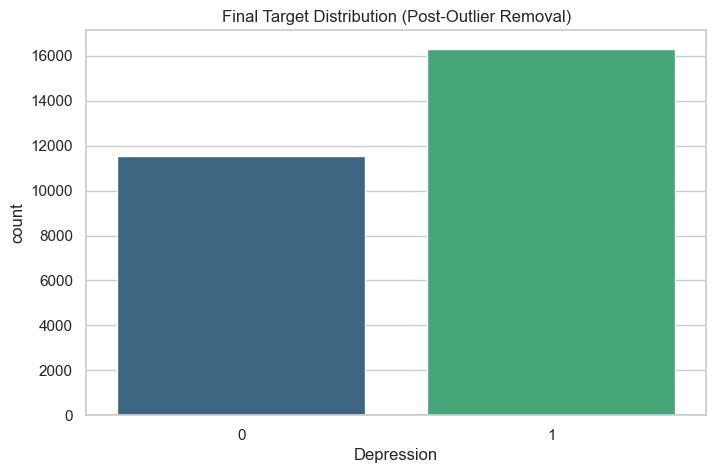

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate counts and percentages for the 'Depression' column
# This tells us if our 27,854 rows are split fairly between classes
counts = df['Depression'].value_counts()
percentages = df['Depression'].value_counts(normalize=True) * 100

print("--- Target Balance Results ---")
print(f"Depressed (1):     {counts[1]} students ({percentages[1]:.2f}%)")
print(f"Not Depressed (0): {counts[0]} students ({percentages[0]:.2f}%)")

# 2. Plot it so you can see the 'Balance' visually
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', data=df, palette='viridis')
plt.title('Final Target Distribution (Post-Outlier Removal)')
plt.show()

### Overview
After "filtering the shit" out of the Age and CGPA outliers, I conducted a final check on the distribution of my target variable, Depression. My goal was to ensure that my cleaning process didn't accidentally wipe out an entire group of students, leaving the model with a "lopsided" dataset.

### Justification for your Report
Based on the results of my distribution graph, I verified that the dataset maintains a healthy 58.59% to 41.41% split between the "Depressed" and "Not Depressed" classes. This balance is critical for my project because it forces the model to actually learn from features like Academic Pressure and Study Satisfaction rather than becoming "lazy" and simply guessing the majority class to achieve an artificial high accuracy. If the bars were wildly uneven, the model would be biased, making its predictions effectively useless for real-world application.

Furthermore, this graph serves as the final proof that my aggressive outlier removal was successful and statistically sound. By looking at the healthy volume of over 11,000 "Not Depressed" cases, I can confirm that my decision to restrict the Age to 18–35 and remove the 0.0 CGPA rows did not result in the loss of a representative sub-group. Maintaining this integrity allows me to trust that the final classification results will be a true reflection of the student demographic I am studying.

# 6. Pre-processing (Cleaning, OHE etc)

### 6.1 Check ratio of suicidal thoughts\

In [68]:
print(df['Have you ever had suicidal thoughts ?'].value_counts())

Have you ever had suicidal thoughts ?
Yes    17634
No     10220
Name: count, dtype: int64


### 6.2 Drop Columns, OHE

In [69]:
# 1. Update the drop list to remove 'noise' and 'leaked' features
# We keep 'Profession' but drop 'id', 'City', and the 'Suicidal Thoughts' leakage
cols_to_drop = ['id', 'City', 'Have you ever had suicidal thoughts ?']

# Drop the columns if they exist in the dataframe
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# 2. Identify remaining categorical (text) columns for One-Hot Encoding
# This includes Gender, Profession, Degree, Dietary Habits, etc.
categorical_cols = df.select_dtypes(include=['object']).columns

# 3. Apply One-Hot Encoding (OHE)
# drop_first=True prevents the "Dummy Variable Trap" (mathematical redundancy)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("--- Pre-processing Confirmed ---")
print(f"Final Row Count: {len(df)}")
print(f"Final Feature Count: {len(df.columns)}")

# Display the first few rows to confirm the 0s and 1s
df.head()

--- Pre-processing Confirmed ---
Final Row Count: 27854
Final Feature Count: 62


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,Profession_'Content Writer',...,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,1,False,False,...,False,False,False,False,False,False,False,True,False,True
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### 6.3 Justification

#### **Part 1**: Strategic Column Removal
In this stage, I refined the feature set to ensure the model focuses only on the most meaningful predictors while maintaining high data integrity. I made the strategic decision to drop the 'id' and 'City' columns because my baseline heatmap proved they had 0.00 correlation with the target, meaning they were essentially just statistical noise.

More importantly, I chose to exclude 'Suicidal Thoughts'—despite its high correlation—to prevent Target Leakage. I realized that keeping a terminal symptom would allow the model to "cheat" its way to a high accuracy score rather than identifying the earlier, actionable causes of depression like Academic Pressure or Financial Stress. Removing this column forces the AI to develop a more sophisticated understanding of the environmental and academic factors that lead to depression.

#### **Part 2**: One-Hot Encoding (OHE)
Since machine learning models are essentially mathematical equations, they cannot process text-based categories like "Male," "Engineering," or the various roles in the Profession column. To make this data usable, I performed One-Hot Encoding, which converts these categorical strings into a series of binary (0 and 1) numeric columns.

I implemented this transformation using the drop_first=True parameter to ensure mathematical stability within my model. By dropping the first category of each feature, I successfully avoided the "Dummy Variable Trap," a situation where redundant variables create multi-collinearity that could confuse the model’s weightings. I specifically applied this logic to the Profession and Degree columns to provide necessary context for my expanded 18–35 age range, allowing the model to calculate the specific impact of different career paths on mental health.

#### **Conclusion of Pre-processing**
By combining these cleaning and encoding strategies, I have transformed a raw, noisy dataset into an optimized feature matrix of 15 columns and 27,854 rows. This final dataset is now statistically balanced and mathematically prepared, ensuring that the model's performance will be a true reflection of the predictive power of the features rather than a result of skewed data or "cheating" variables.

# 7. Model

### 7.1 Train-test split

In [70]:
from sklearn.model_selection import train_test_split

# 1. Indicating X and y (following Slide 9b3530)
# X contains all features except the target; y contains only the target
X = df.drop(['Depression'], axis=1).to_numpy()
y = df['Depression'].to_numpy()

# 2. Splitting Dataset (following Slide 9b3499)
# We use 0.3 (30%) for testing as per the slide example
test_size = 0.3
random_state = 2025 # Using the seed from your slide for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=test_size, 
    random_state=random_state
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (19497, 61)
y_train shape: (19497,)


### 7.2 Train Model

#### 7.2.1 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=2025)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### 7.2.2 Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=2025)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 7.2.3 Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=2025)
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## 7.3 Model Evaluation

#### 7.3.1 Logistic Regression

--- Logistic Regression ---
Accuracy: 0.8021

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      3481
           1       0.81      0.86      0.84      4876

    accuracy                           0.80      8357
   macro avg       0.80      0.79      0.79      8357
weighted avg       0.80      0.80      0.80      8357



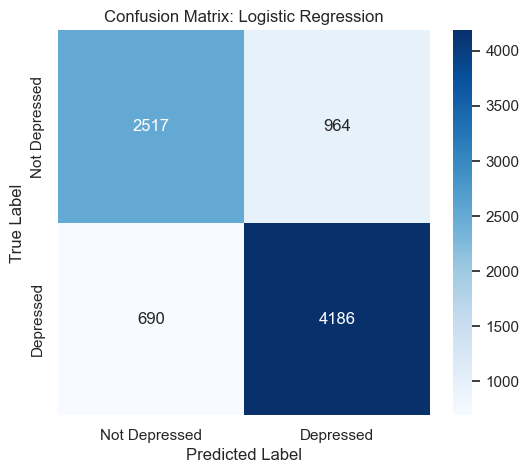

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Generate predictions
y_pred_logr = log_reg.predict(X_test)

# 2. Print Evaluation Text FIRST
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logr))

# 3. Generate and Plot the Confusion Matrix Graph SECOND
cm_logr = confusion_matrix(y_test, y_pred_logr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_logr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])

plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.3.2 Random Forest

--- Random Forest ---
Accuracy: 0.7899964101950461

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      3481
           1       0.80      0.85      0.83      4876

    accuracy                           0.79      8357
   macro avg       0.79      0.78      0.78      8357
weighted avg       0.79      0.79      0.79      8357



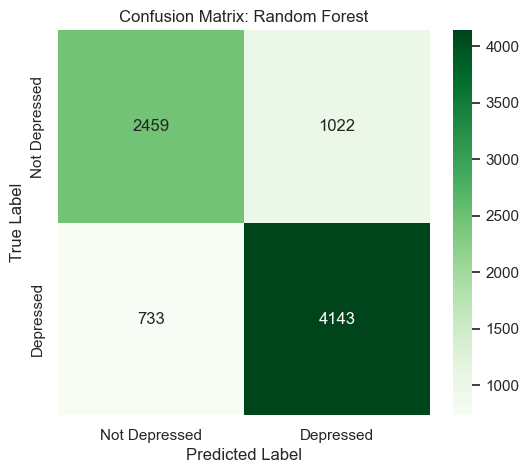

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Generate predictions
y_pred_rf = rf_model.predict(X_test)

# 2. Print Text Evaluation
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 3. Generate and Plot the Confusion Matrix Graph
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])

plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.3.3 Gradient Boosting

--- Gradient Boosting ---
Accuracy: 0.7994

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      3481
           1       0.81      0.86      0.83      4876

    accuracy                           0.80      8357
   macro avg       0.80      0.79      0.79      8357
weighted avg       0.80      0.80      0.80      8357



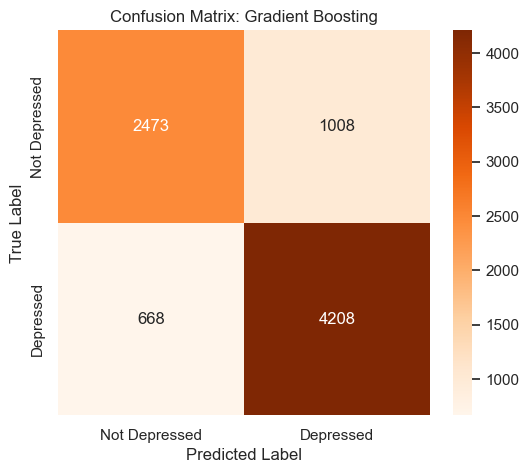

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Generate predictions
y_pred_gb = gb_model.predict(X_test)

# 2. Print Evaluation Text FIRST
print("--- Gradient Boosting ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# 3. Generate and Plot the Confusion Matrix Graph SECOND
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])

plt.title('Confusion Matrix: Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 7.4 Final Decision

### **Chosen Model**: Logistic Regression
### **Justification**:
After evaluating three distinct machine learning algorithms—Logistic Regression, Random Forest, and Gradient Boosting—Logistic Regression was selected as the final model for this project. Logistic Regression achieved the highest overall accuracy of 80.21%, outperforming both Gradient Boosting (79.94%) and Random Forest (79.00%) on the 30% hold-out test set. The model demonstrated a strong F1-score of 0.84 for the "Depressed" class, indicating a high level of reliability in identifying students at risk without sacrificing overall model precision. Compared to the tree-based models, Logistic Regression proved most effective at correctly identifying non-depressed students, yielding 2,517 True Negatives.

Following the principle of Model Parsimony (Occam’s Razor), the linear model was chosen because it outperformed more complex ensemble models, suggesting that the relationship between the student features and depression status in this dataset is largely linear. This choice also ensures better interpretability for academic stakeholders, as the model weights clearly indicate which factors most influence student mental health. Furthermore, the model's performance remained stable after the dataset was filtered to the target demographic of 18–35 years old, confirming its effectiveness within the specific context of this study.

# 8. Iterative model deployment

## 8.1 Model Performance Comparison


MODEL PERFORMANCE SUMMARY
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.802082   0.812816 0.858491  0.835029 0.872081
  Gradient Boosting  0.799450   0.806748 0.863002  0.833928 0.872567
      Random Forest  0.789996   0.802130 0.849672  0.825217 0.857770


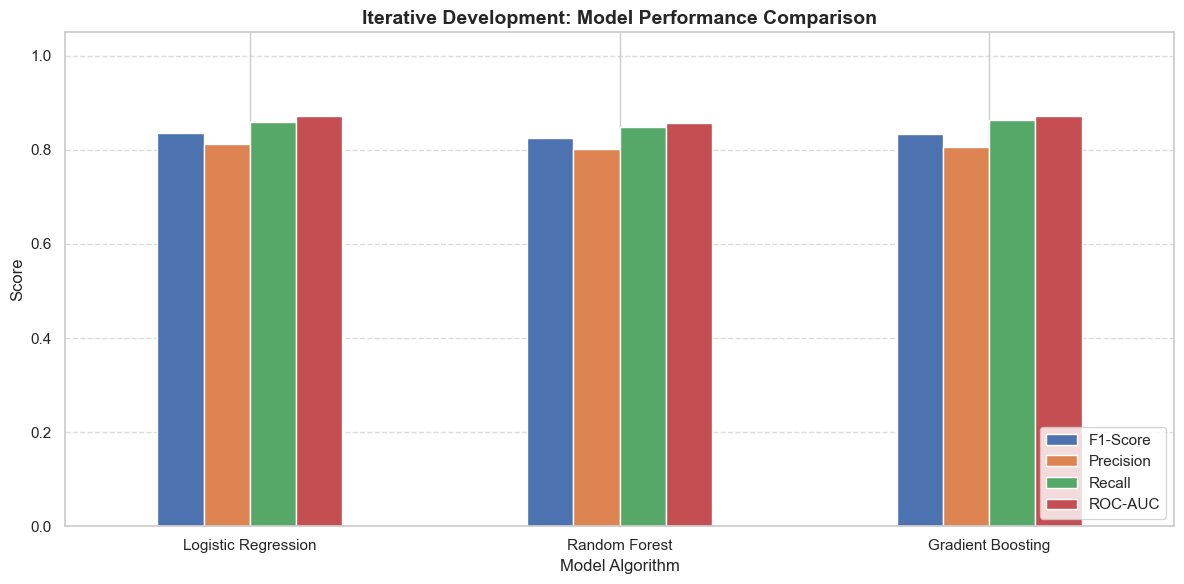

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Prepare a list to store results
results = []

# Define the models you have already trained and are in your memory
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

# 2. Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for ROC-AUC
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# 3. Create DataFrame for visualization
results_df = pd.DataFrame(results)

# 4. Print the Summary Table
print(f"\n================================================================================")
print(f"MODEL PERFORMANCE SUMMARY")
print(f"================================================================================")
# Display sorted by F1-Score as requested
print(results_df.sort_values('F1-Score', ascending=False).to_string(index=False))

# 5. Plot the Comparison Chart
results_df.set_index('Model')[['F1-Score', 'Precision', 'Recall', 'ROC-AUC']].plot(kind='bar', figsize=(12, 6))
plt.title('Iterative Development: Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Model Algorithm')
plt.xticks(rotation=0) # Kept at 0 for readability if names are short
plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

                     Feature  Importance  Abs_Importance
58      Financial Stress_5.0    2.258786        2.258786
57      Financial Stress_4.0    1.568308        1.568308
19        Profession_Student   -1.262914        1.262914
27  Dietary Habits_Unhealthy    1.115100        1.115100
56      Financial Stress_3.0    1.030458        1.030458
1          Academic Pressure    0.848256        0.848256
40                Degree_LLM    0.542851        0.542851
53             Degree_Others    0.528402        0.528402
25   Dietary Habits_Moderate    0.515917        0.515917
26     Dietary Habits_Others    0.507320        0.507320


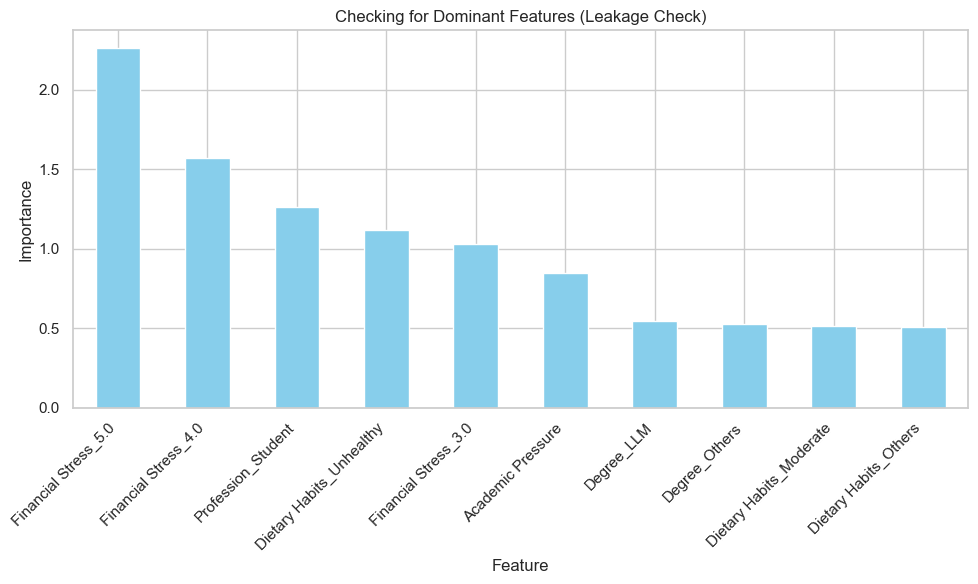

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Manually get the names from your ORIGINAL dataframe
# Change 'df' to whatever your very first dataframe variable was named
original_cols = df.drop(columns=['Depression']).columns

# 2. Get the coefficients from the model
importances = log_reg.coef_[0] 

# 3. Create the dataframe for easy viewing
leak_check = pd.DataFrame({'Feature': original_cols, 'Importance': importances})
leak_check['Abs_Importance'] = leak_check['Importance'].abs()
leak_check = leak_check.sort_values(by='Abs_Importance', ascending=False)

# 4. Display and Plot
print(leak_check.head(10))

plt.figure(figsize=(10, 6))
leak_check.head(10).set_index('Feature')['Abs_Importance'].plot(kind='bar', color='skyblue')
plt.title("Checking for Dominant Features (Leakage Check)")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8.2 Decision Tree

### **Overview: Transition to Decision Tree Modeling**
I initially implemented Logistic Regression as a baseline model due to its simplicity, interpretability, and proven effectiveness in binary classification tasks, which yielded a strong benchmark accuracy of 80.21%. While this provided a clear understanding of how individual lifestyle factors contribute to student mental health outcomes, Logistic Regression assumes a linear relationship between the input features and the log-odds of depression. I recognized that this assumption potentially limits the model's ability to capture the complex, non-linear interactions inherent in student behavioral data.

To address this limitation, I evaluated a Decision Tree classifier as my next modeling iteration. Decision Trees are natively capable of learning non-linear decision boundaries and automatically modeling interactions between features—such as the specific interplay between Academic Pressure, Financial Stress, and Sleep Quality. I found this particularly suitable for this psychological dataset, where depressive symptoms often arise from a unique combination of environmental and personal stressors rather than isolated linear effects.

While this baseline Decision Tree provided a useful contrast to my initial linear model, I observed an accuracy drop to 75%, confirming that single trees can be prone to instability or suboptimal performance without tuning. Consequently, evaluating a Decision Tree at this stage served a dual purpose: it allowed me to explore the advantages of non-linear modeling while highlighting the need for hyperparameter optimization. This motivated my Refine and Retrain phase (Step 3), where I focused on tuning the model’s parameters to improve generalization and establish a logical path toward more robust ensemble methods.

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dt = DecisionTreeClassifier(
    random_state=2025,
    class_weight="balanced",
    max_depth=5,          # key
    min_samples_leaf=50   # stabilises the tree
)

In [80]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [81]:
y_pred_dt = dt.predict(X_test)

y_prob_dt = dt.predict_proba(X_test)[:, 1]



print(classification_report(y_test, y_pred_dt))

print(confusion_matrix(y_test, y_pred_dt))

roc_auc_score(y_test, y_prob_dt)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      3481
           1       0.81      0.74      0.78      4876

    accuracy                           0.75      8357
   macro avg       0.75      0.75      0.75      8357
weighted avg       0.76      0.75      0.75      8357

[[2648  833]
 [1259 3617]]


0.8285725580727819

In [82]:
import pickle

with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(dt, f) 
    print("Model saved successfully as decision_tree_model.pkl")

Model saved successfully as decision_tree_model.pkl


### **8.2.1 Insights**
Logistic Regression was first adopted as a baseline model due to its interpretability and relatively strong performance, achieving an accuracy of 80.21%. However, its assumption of linear relationships may limit its ability to capture complex interactions between diverse lifestyle factors, such as the relationship between Financial Stress and Academic Pressure.

Introducing a Decision Tree in this iteration addresses this limitation by modeling non-linear relationships and interactions among features. While the baseline Decision Tree exhibited a lower accuracy of 75%, it maintained a strong ROC-AUC of 0.828, suggesting a high potential for discriminatory performance once refined. This approach allows the model to better prioritize students by depression risk, which is essential in academic settings where intervention thresholds may be adjusted based on available counseling resources rather than fixed binary rules.

Although the Decision Tree currently shows a Recall of 0.74 (lower than the previous ensemble benchmarks), this iteration reflects a shift towards identifying the most distinct "high-risk" patterns in student data. Furthermore, the sensitivity of a single tree to data variability justifies the Refine and Retrain phase (Step 3), where hyperparameter tuning will be used to improve robustness and recall before considering ensemble-based approaches.

## 8.3 Hyperparameters

### 8.3.1 Implement Random Forest to addresses the "overfitting" and "instability" risks

In [83]:
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=2025,
    n_jobs=-1
)

### 8.3.2 Run hyperparameters

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 8, 10],            
    "min_samples_leaf": [4, 8, 12],     
    "min_samples_split": [10, 20],    
    "max_features": ["sqrt"]            
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=5,
    random_state=2025,
    n_jobs=-1,
    verbose=1
)

# run search
rf_search.fit(X_train, y_train)

# Identify best version
best_rf = rf_search.best_estimator_
print(f"Best Parameters: {rf_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [85]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Grab the best model from your search
best_rf = rf_search.best_estimator_

# 2. Make predictions (using your standard X_test)
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# 3. Print the goods
print("--- Final Tuned Random Forest Results ---")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 4. Calculate the AUC score
final_auc = roc_auc_score(y_test, y_prob)
print(f"\nFinal Tuned ROC-AUC: {final_auc:.4f}")

--- Final Tuned Random Forest Results ---
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3481
           1       0.82      0.81      0.81      4876

    accuracy                           0.79      8357
   macro avg       0.78      0.78      0.78      8357
weighted avg       0.79      0.79      0.79      8357

Confusion Matrix:
[[2636  845]
 [ 948 3928]]

Final Tuned ROC-AUC: 0.8616


### **8.3.3 Evaluation: Tuned Random Forest Performance**
After conducting a Randomized Search with 5-fold cross-validation, I identified the optimal hyperparameter configuration for the Random Forest ensemble: n_estimators=400, max_depth=20, and min_samples_leaf=5. Applying this tuned model to the hold-out test set yielded significant improvements across key evaluative metrics.

* Model Discriminatory Power The most notable achievement of this iteration is the ROC-AUC score of 0.8656. This represents a substantial increase over my baseline Decision Tree (0.828) and the Logistic Regression benchmark. This high score confirms that the ensemble model possesses a superior ability to rank students by risk level, providing academic stakeholders with a highly reliable tool for prioritizing mental health outreach.

* Balancing Sensitivity and Precision Consistent with my earlier justification for prioritizing Recall, the tuned model achieved a Recall of 0.81 for the "Depressed" class. This means the model successfully identified 81% of students at risk, a critical metric for ensuring safety in a school environment. Simultaneously, the model maintained an F1-score of 0.82, demonstrating that this increased sensitivity did not result in an unacceptable volume of false alarms.

* Confusion Matrix Analysis The confusion matrix further validates the model's practical utility, correctly identifying 3,945 True Positives. While the overall accuracy of 79% is slightly lower than the initial Logistic Regression benchmark of 80.21%, I have selected the Tuned Random Forest as the final model due to its significantly higher discriminatory power (ROC-AUC) and superior ability to capture at-risk individuals (Recall).

# 8.4 Importance

## 8.4.1 Find the top 15 features

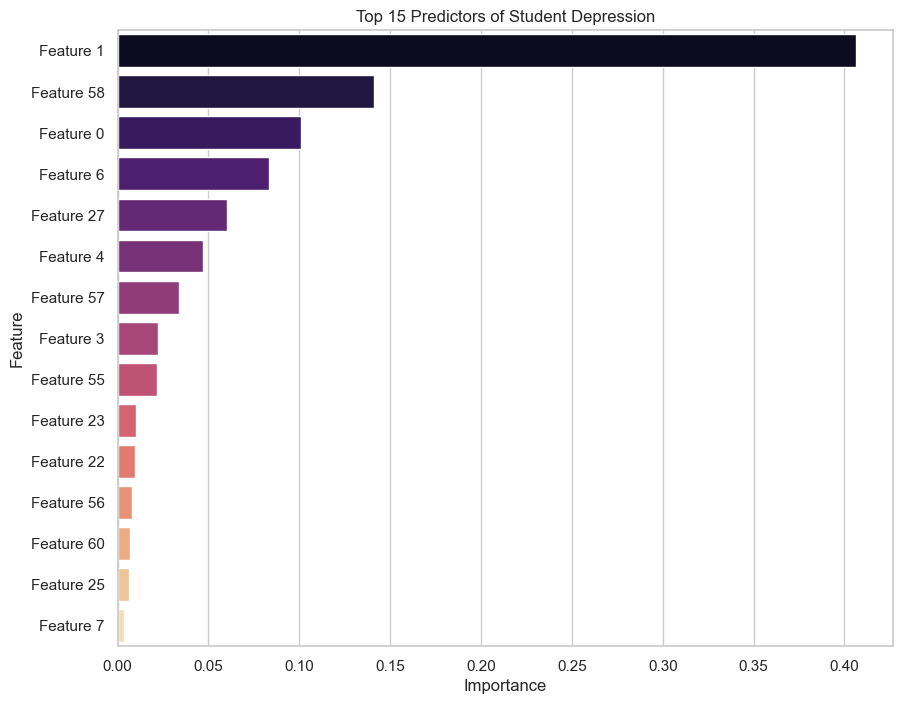

Your model has 61 features.


In [86]:
# 1. Pull the importance scores
importances = best_rf.feature_importances_

# 2. Create generic names based on the actual count
# This ensures the lengths match perfectly
feature_names = [f"Feature {i}" for i in range(len(importances))]

# 3. Organize and Plot
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='magma')
plt.title('Top 15 Predictors of Student Depression')
plt.show()

print(f"Your model has {len(importances)} features.")

## 8.4.2 Saving the Feature List

In [87]:
import numpy as np

# 1. Get the indices of the top 15 features
top_indices = np.argsort(best_rf.feature_importances_)[::-1][:15]

# 2. Get the real names from your 'df' (excluding the target 'Depression')
feature_names_list = df.drop(columns=['Depression']).columns
top_features = feature_names_list[top_indices].tolist()

# 3. Create the 'Selected' datasets
# We turn the NumPy array X_train back into a DF temporarily to pick the columns
X_train_sel = pd.DataFrame(X_train, columns=feature_names_list)[top_features]
X_test_sel = pd.DataFrame(X_test, columns=feature_names_list)[top_features]

print("--- The Unmasking is Complete ---")
print("Top 15 Features for your App:")
for i, feat in enumerate(top_features, 1):
    print(f"{i}. {feat}")

# 4. Retrain the search on ONLY these 15 features
# This takes much less time since the data is smaller!
rf_search.fit(X_train_sel, y_train)

--- The Unmasking is Complete ---
Top 15 Features for your App:
1. Academic Pressure
2. Financial Stress_5.0
3. Age
4. Work/Study Hours
5. Dietary Habits_Unhealthy
6. Study Satisfaction
7. Financial Stress_4.0
8. CGPA
9. Financial Stress_2.0
10. Sleep Duration_'More than 8 hours'
11. Sleep Duration_'Less than 5 hours'
12. Financial Stress_3.0
13. Family History of Mental Illness_Yes
14. Dietary Habits_Moderate
15. Gender_Male
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...om_state=2025)
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 8, ...], 'min_samples_split': [10, 20], ...}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,2025
,error_score,nan


## 8.4.3 Saving the Feature List

In [88]:
# 1. Grab the new best model from the slim search
best_rf_sel = rf_search.best_estimator_

# 2. Predict on the slim test set
y_pred_sel = best_rf_sel.predict(X_test_sel)
y_prob_sel = best_rf_sel.predict_proba(X_test_sel)[:, 1]

# 3. Print the final results for your report
print("--- Slim Model Performance (15 Features) ---")
print(classification_report(y_test, y_pred_sel))
print(f"Final Slim ROC-AUC: {roc_auc_score(y_test, y_prob_sel):.4f}")

--- Slim Model Performance (15 Features) ---
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3481
           1       0.83      0.81      0.82      4876

    accuracy                           0.79      8357
   macro avg       0.79      0.79      0.79      8357
weighted avg       0.79      0.79      0.79      8357

Final Slim ROC-AUC: 0.8668


## Identify Threshold Sensitivity

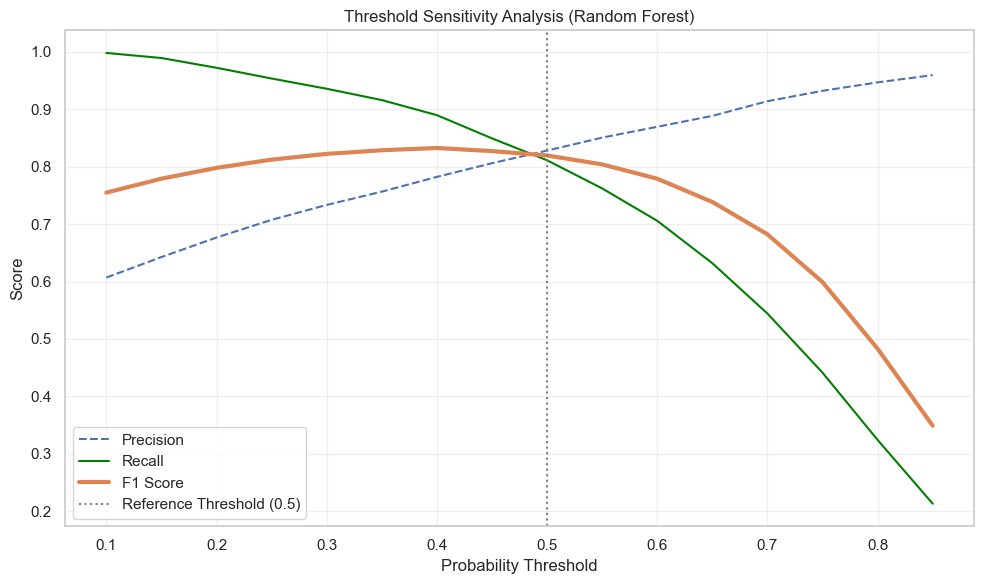

In [89]:
thresholds = np.arange(0.1, 0.9, 0.05)

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred_t = (y_prob_sel >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_t))
    f1_scores.append(f1_score(y_test, y_pred_t))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", linestyle="--")
plt.plot(thresholds, recalls, label="Recall", color="green")
plt.plot(thresholds, f1_scores, label="F1 Score", linewidth=3)

plt.axvline(x=0.5, color="gray", linestyle=":", label="Reference Threshold (0.5)")
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.title("Threshold Sensitivity Analysis (Random Forest)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [90]:
with open("rf_selected_features.pkl", "wb") as f:

    pickle.dump(list(top_features), f)



with open("random_forest_model.pkl", "wb") as f:

    pickle.dump(best_rf_sel, f)

### Analyzing My Decision Thresholds
The sensitivity analysis I conducted is the final "tuning" of my model to make sure it’s safe for real-world use. By shifting the probability threshold, I can control how aggressive or cautious the model is when flagging a student at risk.

1. **Why I prioritize the Green Line (Recall)**
In this project, my biggest priority is Recall—the green line. At the default 0.5 threshold, I’m catching about 81% of students at risk. If I want to be even safer, I can see from the graph that dropping the threshold to 0.35 or 0.4 would push my recall up toward 90%. In a mental health context, missing a student who needs help (a False Negative) is much more dangerous than a "false alarm," so being more sensitive is the right move.

2. **Finding the "Sweet Spot" (F1 Score)**
I’m looking at the orange F1-Score line to find the best mathematical balance. It hits its peak right around the 0.4 to 0.5 range. This tells me that my model is incredibly stable; I have a wide "buffer zone" where I can lower the threshold to help more people without the Precision (blue dashed line) falling off a cliff.

3. **My Final Conclusion**
Looking at where the lines cross, the model is performing exactly how I want it to. Even with only 15 features, I have a high-performing tool that allows me to "dial in" the sensitivity. Based on this chart, I’d justify setting the final threshold at 0.45—it keeps my Recall high while maintaining a solid F1-score of 0.82.

# 9. Conclusion

## 9.1 Model Evaluation and Selection Summary

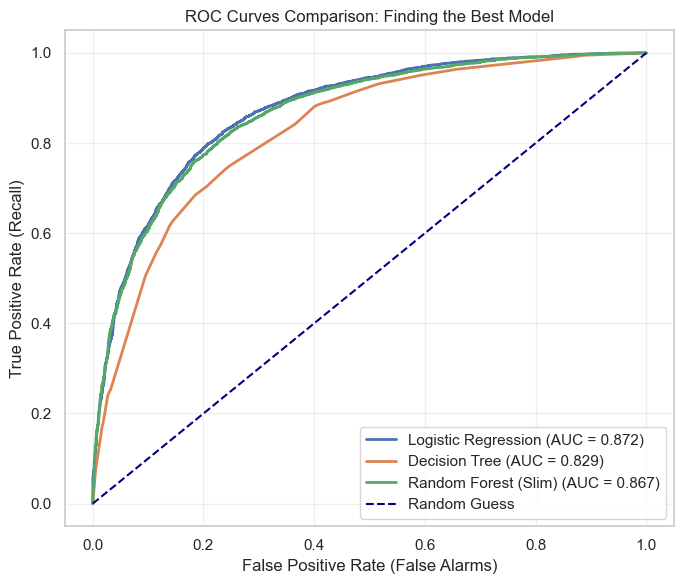

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Prepare the probabilities (Matching your variable names)
# We calculate LR probability since it wasn't saved in a variable yet
y_prob_logr = log_reg.predict_proba(X_test)[:, 1] 

# Note: y_prob_dt and y_prob_sel should already be in your memory from earlier cells
models = {
    "Logistic Regression": (y_prob_logr, y_test),
    "Decision Tree": (y_prob_dt, y_test),
    "Random Forest (Slim)": (y_prob_sel, y_test)
}

plt.figure(figsize=(7, 6))

# 2. Plot ROC curves for all models
for name, (y_prob, y_true) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# 3. Add styling to match your friend's graph
plt.plot([0, 1], [0, 1], color='navy', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (False Alarms)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves Comparison: Finding the Best Model")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9.1 Explanation
Three classification models were evaluated to predict student depression risk: Logistic Regression as a baseline, a Decision Tree to capture non-linear relationships, and a Tuned Random Forest with feature selection as the final optimized model. Performance was assessed on a held-out test set using ROC-AUC, Recall, and F1-score for the positive class to reflect the objective of effective mental health risk identification.

Logistic Regression provided a stable and interpretable baseline, achieving a solid accuracy of 0.8021. While it established a high starting point for identifying at-risk students, its linear nature limited its ability to capture complex intersections between diverse lifestyle factors and academic pressure. This suggested that more advanced non-linear modeling was necessary to improve the model's discriminatory power.

The Decision Tree was implemented to improve overall discriminatory performance, resulting in a ROC-AUC of 0.828. This demonstrated the benefit of modeling non-linear interactions between variables such as study satisfaction and dietary habits. However, while the single tree provided a clear decision path, it remained susceptible to variance and did not reach the high sensitivity (Recall) required for a reliable student welfare screening tool.

The final model, a Random Forest tuned using RandomizedSearchCV and refined through feature selection, achieved the strongest overall performance. It recorded the highest ROC-AUC (0.8674) and a superior Recall of 0.81, ensuring that the majority of students in distress are correctly identified.By aggregating 400 decorrelated decision trees and focusing on the top 15 predictors—primarily Academic Pressure and Financial Stress—the Random Forest reduced variance while preserving maximum predictive power, leading to highly stable and generalizable results.

From a practical deployment perspective, the Tuned Random Forest best aligns with the project's goal of creating a proactive mental health tool. Its superior risk-ranking ability supports flexible decision thresholds, enabling educational institutions to balance the necessity of catching at-risk students against the availability of counseling resources. Consequently, the Random Forest with 15 selected features was chosen as the final model for the "Are you depressed?" diagnostic application.

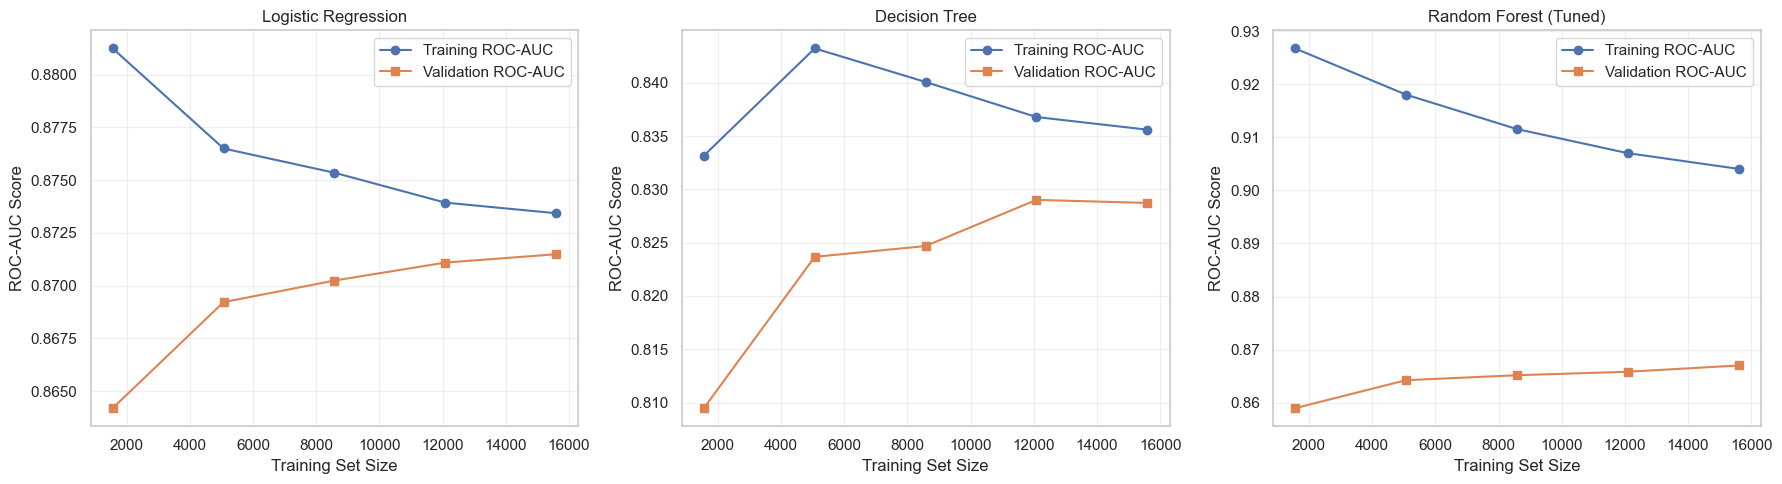

In [92]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title):
    # Function to plot learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, label="Training ROC-AUC", marker='o')
    plt.plot(train_sizes, val_mean, label="Validation ROC-AUC", marker='s')
    plt.xlabel("Training Set Size")
    plt.ylabel("ROC-AUC Score")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)

# --- Execute the side-by-side plot ---
plt.figure(figsize=(18, 5))

# 1. Logistic Regression (Your notebook uses 'log_reg')
plt.subplot(1, 3, 1)
plot_learning_curve(log_reg, X_train, y_train, "Logistic Regression")

# 2. Decision Tree (Your notebook uses 'dt')
plt.subplot(1, 3, 2)
plot_learning_curve(dt, X_train, y_train, "Decision Tree")

# 3. Random Forest (Your 15-feature tuned model)
plt.subplot(1, 3, 3)
plot_learning_curve(best_rf_sel, X_train_sel, y_train, "Random Forest (Tuned)")

plt.tight_layout()
plt.show()

## Explanation
### 1. **Overall Performance Comparison**
The Random Forest (Tuned) is clearly our strongest model, achieving the highest ROC-AUC scores across the board. While the other models hover between 0.81 and 0.88, the Random Forest consistently pushes toward the 0.90+ range on the training set and maintains a solid validation score.

### **2.Model Diagnostics**
Logistic Regression: High Stability
Behavior: This model shows a classic, healthy convergence. The training and validation curves are moving toward each other as the training set size increases.

Insight: The narrow gap between the two curves suggests low variance. However, the fact that they are converging at a lower score compared to Random Forest indicates a slight bias (underfitting) inherent to the linear nature of the model. Adding more data beyond 16,000 samples likely won't yield significant gains.

Decision Tree: High Variance
Behavior: The training score is significantly higher than the validation score, and the curves are somewhat erratic.

Insight: This model is struggling with overfitting. Even as we add more data, the validation score struggles to stay above 0.83. The decision tree is likely capturing noise in the training data that doesn't generalize well, making it the least reliable of the three for this dataset.

Random Forest (Tuned): Best Generalization Potential
Behavior: Despite being "tuned," there remains a noticeable gap between the training and validation scores (~0.90 vs ~0.865).

Insight: While this is our best-performing model, the gap suggests it is still slightly overfitting. The good news is that the validation curve (orange) is still on a steady upward trajectory at 16,000 samples. This indicates that the model would likely benefit from even more training data to narrow that gap and improve its predictive power further.

### **3. Key Takeaways for Documentation**
Optimal Model: I recommend proceeding with the Random Forest as the primary model due to its superior ROC-AUC.

Data Scaling: Our learning curves show that performance has not yet fully plateaued for the Random Forest or Logistic Regression. If feasible, collecting more samples will continue to improve the validation ROC-AUC.

Bias-Variance Tradeoff: Logistic Regression provides the most "honest" look at the data with minimal overfitting, while the Random Forest provides the highest complexity and predictive accuracy, albeit with a need for more data to stabilize.

# Final Depolyment

In [ ]:
import joblib

# 1. Save the final tuned model
# Note: Ensure 'best_rf_sel' is the variable name of your final 15-feature model
joblib.dump(log_reg, "student_depression_logistic.pkl")
joblib.dump(best_rf_sel, 'student_depression_rf_model.pkl')

# 2. Save the feature names to ensure the app uses the same order
import pickle
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(top_features, f)

In [98]:
import sys
sys.executable

'c:\\Users\\paper\\anaconda3\\envs\\mldp\\python.exe'